In [111]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [112]:
df= pd.read_csv("Signal Database.csv")
df =pd.DataFrame(df)
df.head()

,Sn.No,GROUP,GENDER,AGE,RIGHT_HANDED,HEALTHY,GLASSES,SMOKER,MEDICAL_TREATMENT,MEDICINE_OR_SUPPLEMENTS,TRANSFER_RATE,TEST_TYPE,TEST_NAME,NUMBER_OF_EVENTS,EVENT_DURATION (ms),SESSION_DATA,STEADY-STATE TIME (s),TEST_DURATION (s)
0,1,A,MALE,48,NO,YES,YES,NO,YES,YES,128,VISUAL,IMAGE SEARCH,5,250,A001SV1_1.EDF,5,96
1,1,A,MALE,48,NO,YES,YES,NO,YES,YES,128,VISUAL,FIVE BOX 1,20,250,A001SB1_1.EDF,5,71
2,1,A,MALE,50,NO,YES,YES,NO,YES,YES,128,MOTOR IMAGES,HAND SHAKE,6,5000,A001SM1_1.EDF,25,46
3,2,A,MALE,22,YES,YES,NO,NO,NO,NO,128,VISUAL,FIVE BOX 1,20,250,A002SB1_1.EDF,5,67
4,2,A,MALE,22,YES,YES,NO,NO,NO,NO,128,VISUAL,FIVE BOX 2,20,250,A002SB2_1.EDF,5,70


In [113]:
from sklearn.preprocessing import LabelEncoder
pred = df.drop(['GENDER'],axis =1)
col = list(pred.columns)
enc = LabelEncoder()
target = enc.fit_transform(df.GENDER)
Right_handed =enc.fit_transform(df.RIGHT_HANDED)

In [114]:

df.GROUP = df.GROUP.map({'A':1})
df.RIGHT_HANDED =df.RIGHT_HANDED.map({'YES':1,'NO':0})
df.HEALTHY =df.HEALTHY.map({'YES':1,'NO':0})
df.GLASSES =df.GLASSES.map({'YES':1,'NO':0})
df.SMOKER =df.SMOKER.map({'YES':1,'NO':0})
df.MEDICAL_TREATMENT =df.MEDICAL_TREATMENT.map({'YES':1,'NO':0})
df.MEDICINE_OR_SUPPLEMENTS =df.MEDICINE_OR_SUPPLEMENTS.map({'YES':1,'NO':0})
df.TEST_TYPE =df.TEST_TYPE.map({'VISUAL':1,'MOTOR IMAGES':2})
df.TEST_NAME =df.TEST_NAME.map({'IMAGE SEARCH':1,'FIVE BOX 1':2,'HAND SHAKE':3,'FIVE BOX 2':4,'FIVE BOX 3':5})


In [115]:
df.head()

,Sn.No,GROUP,GENDER,AGE,RIGHT_HANDED,HEALTHY,GLASSES,SMOKER,MEDICAL_TREATMENT,MEDICINE_OR_SUPPLEMENTS,TRANSFER_RATE,TEST_TYPE,TEST_NAME,NUMBER_OF_EVENTS,EVENT_DURATION (ms),SESSION_DATA,STEADY-STATE TIME (s),TEST_DURATION (s)
0,1,1,MALE,48,0,1,1,0,1,1,128,1,1,5,250,A001SV1_1.EDF,5,96
1,1,1,MALE,48,0,1,1,0,1,1,128,1,2,20,250,A001SB1_1.EDF,5,71
2,1,1,MALE,50,0,1,1,0,1,1,128,2,3,6,5000,A001SM1_1.EDF,25,46
3,2,1,MALE,22,1,1,0,0,0,0,128,1,2,20,250,A002SB1_1.EDF,5,67
4,2,1,MALE,22,1,1,0,0,0,0,128,1,4,20,250,A002SB2_1.EDF,5,70


In [116]:
x = df.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14]]

In [117]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]


In [118]:
kmeans.cluster_centers_

array([[2.38839286e+01, 9.10714286e-01, 1.00000000e+00, 3.83928571e-01,
        1.42857143e-01, 1.78571429e-02, 3.57142857e-02, 1.28000000e+02,
        1.00000000e+00, 2.94642857e+00, 1.61160714e+01, 2.50000000e+02],
       [2.43103448e+01, 8.96551724e-01, 1.00000000e+00, 4.13793103e-01,
        1.37931034e-01, 3.44827586e-02, 6.89655172e-02, 1.28000000e+02,
        2.00000000e+00, 3.00000000e+00, 6.00000000e+00, 5.00000000e+03]])

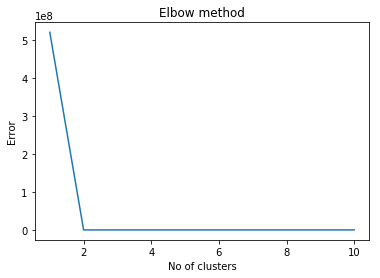

In [119]:
import matplotlib.pyplot as plt
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

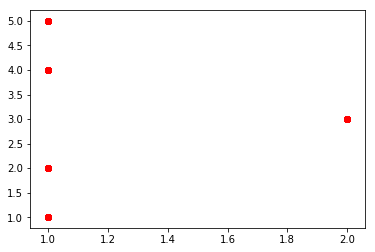

In [127]:
plt.scatter(df['TEST_TYPE'],df['TEST_NAME'],color="red")

In [102]:
df.var()

Sn.No                      7.505866e+01
GROUP                      0.000000e+00
AGE                        2.939919e+01
RIGHT_HANDED               8.429585e-02
HEALTHY                    0.000000e+00
GLASSES                    2.396150e-01
SMOKER                     1.225937e-01
MEDICAL_TREATMENT          2.097264e-02
MEDICINE_OR_SUPPLEMENTS    4.103343e-02
TRANSFER_RATE              0.000000e+00
TEST_TYPE                  1.645390e-01
TEST_NAME                  1.998176e+00
NUMBER_OF_EVENTS           5.137730e+01
EVENT_DURATION (ms)        3.712411e+06
STEADY-STATE TIME (s)      4.649240e+01
TEST_DURATION  (s)         2.406615e+02
dtype: float64